In [1]:
import pandas as pd
import spacy
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Sentiment Percentages:
Sentiment
positive    91.578947
negative     3.684211
             3.578947
neutral      1.157895
Name: count, dtype: float64


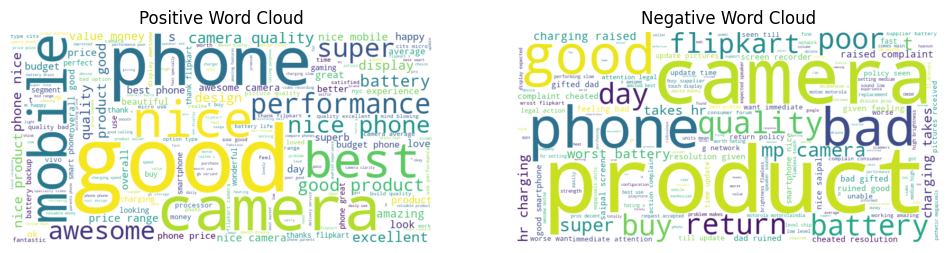

In [2]:

# Load the CSV file
df = pd.read_csv('/Users/harshpatel/Desktop/Final_Project/website/data/Final_Final.csv')

# Load spaCy's English tokenizer
nlp = spacy.load('en_core_web_sm')

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Initialize lists to store sentiment and word frequencies
sentiments = []
positive_words = []
negative_words = []

# Create a new column for sentiment
df['Sentiment'] = ""

# Analyze sentiment and collect words
for index, row in df.iterrows():
    review = row['REVIEW BODY']
    if isinstance(review, str):
        doc = nlp(review)
        analysis = analyzer.polarity_scores(review)
        sentiment = 'positive' if analysis['compound'] >= 0.05 else 'negative' if analysis['compound'] <= -0.05 else 'neutral'
        df.at[index, 'Sentiment'] = sentiment

        # Collect words for positive and negative sentiments
        if sentiment == 'positive':
            positive_words.extend([token.text for token in doc if not token.is_punct and not token.is_stop])
        elif sentiment == 'negative':
            negative_words.extend([token.text for token in doc if not token.is_punct and not token.is_stop])

# Calculate sentiment percentages
sentiment_counts = df['Sentiment'].value_counts()
total_reviews = len(df)
sentiment_percentages = sentiment_counts / total_reviews * 100

# Print sentiment percentages
print("Sentiment Percentages:")
print(sentiment_percentages)


# Create word clouds for positive and negative sentiments
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_words))
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_words))

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Word Cloud')
plt.axis('off')

plt.show()